In [56]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [57]:
entropy_path = os.path.join('..', 'data', 'processed', 'entropy_data.csv')
entropy_df = pd.read_csv(entropy_path)
entropy_df.drop(columns= ['Unnamed: 0'], inplace= True)

train_processed_path = os.path.join('..', 'data', 'processed', 'processed_train_seqs.csv')
sequences_df = pd.read_csv(train_processed_path)
sequences_df.drop(columns= ['Unnamed: 0', 'max_nuc_freq'], inplace= True)

In [58]:
sequences_df

,target_id,sequence,sequence_lenght
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,29
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,34
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,24
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,20
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,34
...,...,...,...
834,8T3E_EC,AAACUCCAUGUAUUGGUUACCCAUCUGCAUCGAAAACUCUCCGAAC...,202
835,8T3F_EC,AAACUCCAUGUAUUGGUUACCCAUCUGCAUCGAAAACUCUCCGAAC...,202
836,8XCC_B,GUGCUGCUGUCUCCCAGACGGGAGGCAGAACUGCACCUUCCAUCAG...,60
837,8Z1G_T,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,86


In [59]:
expanded_rows = []

for _, row in sequences_df.iterrows():
    seq_id = row['target_id']
    sequence = row['sequence']
    sequence_lenght = row['sequence_lenght']

    for i, nuc in enumerate(sequence):
        expanded_rows.append({
            'sequence_id': seq_id, 
            'position': i,
            'nucleotide': nuc,
            'relative_position': i/(sequence_lenght-1) if sequence_lenght > 1.0 else 0.0
            
        })

In [60]:
long_df = pd.DataFrame(expanded_rows)
long_df.head()

,sequence_id,position,nucleotide,relative_position
0,1SCL_A,0,G,0.000000
1,1SCL_A,1,G,0.035714
2,1SCL_A,2,G,0.071429
3,1SCL_A,3,U,0.107143
4,1SCL_A,4,G,0.142857


Al tener solo 4 valores posibles por nucleotido podemos utilizar one hot encoding para recrear codificar estos valores y que puedan pasar por los modelos.

In [61]:
nuc_one_hot = pd.get_dummies(long_df['nucleotide'])
nuc_one_hot

,-,A,C,G,U,X
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,False,True,False,False
3,False,False,False,False,True,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
137004,False,False,False,False,True,False
137005,False,False,True,False,False,False
137006,False,True,False,False,False,False
137007,False,False,False,False,True,False


In [62]:
for base in ['A', 'C', 'G', 'U']:
    if base not in nuc_one_hot.columns:
        nuc_onehot[base] = 0
nuc_one_hot = nuc_one_hot[['A', 'C', 'G', 'U']]

In [63]:
long_df_encoded = pd.concat([long_df, nuc_one_hot], axis=1)
long_df_encoded.head()

,sequence_id,position,nucleotide,relative_position,A,C,G,U
0,1SCL_A,0,G,0.000000,False,False,True,False
1,1SCL_A,1,G,0.035714,False,False,True,False
2,1SCL_A,2,G,0.071429,False,False,True,False
3,1SCL_A,3,U,0.107143,False,False,False,True
4,1SCL_A,4,G,0.142857,False,False,True,False


Ahora añadamos la entropia calculada en el paso anterior 

In [64]:
entropy_df.head()

,4A4U_A,4V6W_BC,8DC2_B,3W1K_F,1YSH_A,2RLU_A,6WLT_A,3A2K_C,6OJ2_QW,2DU5_D,...,4V4N_B2,8H6E_4A,8EXY_R,7V59_C,1F85_A,1RY1_E,1OW9_A,2JWV_A,4V5G_BB,3WQZ_C
0,0.583584,1.722136,0.905587,1.233717,0.419571,-0.0,2.014722,0.805073,0.998486,0.922783,...,-0.0,1.622628,1.978495,2.041151,-0.0,1.191964,0.863121,1.305625,1.644360,1.077250
1,0.714653,1.585374,0.905587,0.865668,1.938841,-0.0,2.000832,1.618808,1.423995,1.340606,...,-0.0,1.039014,0.968126,2.127202,-0.0,0.655367,1.574417,1.064139,1.570834,1.756345
2,1.648826,1.863899,0.905587,1.677416,0.862807,-0.0,2.133141,1.689083,1.504349,1.649138,...,-0.0,1.325032,0.712755,2.047869,-0.0,0.135239,0.371232,1.152161,1.576972,1.797490
3,0.802224,2.121168,1.558939,1.760372,0.185488,-0.0,1.659555,1.621836,1.694412,1.937440,...,-0.0,0.904637,0.242904,2.104996,-0.0,0.427696,1.626689,0.901745,1.594358,1.726949
4,0.329846,1.893976,1.236641,1.385298,0.038807,-0.0,2.032233,1.716726,1.850838,2.043508,...,-0.0,0.862850,1.063035,1.851991,-0.0,1.203125,0.946373,1.327849,1.983545,1.885012


In [65]:
entropy_long = entropy_df.reset_index().melt(id_vars='index', var_name='sequence_id', value_name='entropy')
entropy_long = entropy_long.rename(columns={'index': 'position'})
entropy_long['position'] = entropy_long['position'].astype(int)
entropy_long.head()

,position,sequence_id,entropy
0,0,4A4U_A,0.583584
1,1,4A4U_A,0.714653
2,2,4A4U_A,1.648826
3,3,4A4U_A,0.802224
4,4,4A4U_A,0.329846


In [66]:
long_df_encoded['position'] = long_df_encoded['position'].astype(int)
long_df_full = pd.merge(long_df_encoded, entropy_long, on=['sequence_id', 'position'], how='left')
long_df_full.head()

,sequence_id,position,nucleotide,relative_position,A,C,G,U,entropy
0,1SCL_A,0,G,0.000000,False,False,True,False,1.640143
1,1SCL_A,1,G,0.035714,False,False,True,False,1.901783
2,1SCL_A,2,G,0.071429,False,False,True,False,1.796112
3,1SCL_A,3,U,0.107143,False,False,False,True,1.837590
4,1SCL_A,4,G,0.142857,False,False,True,False,1.840663


In [67]:
print(max(long_df_full.entropy))

2.32022435667284


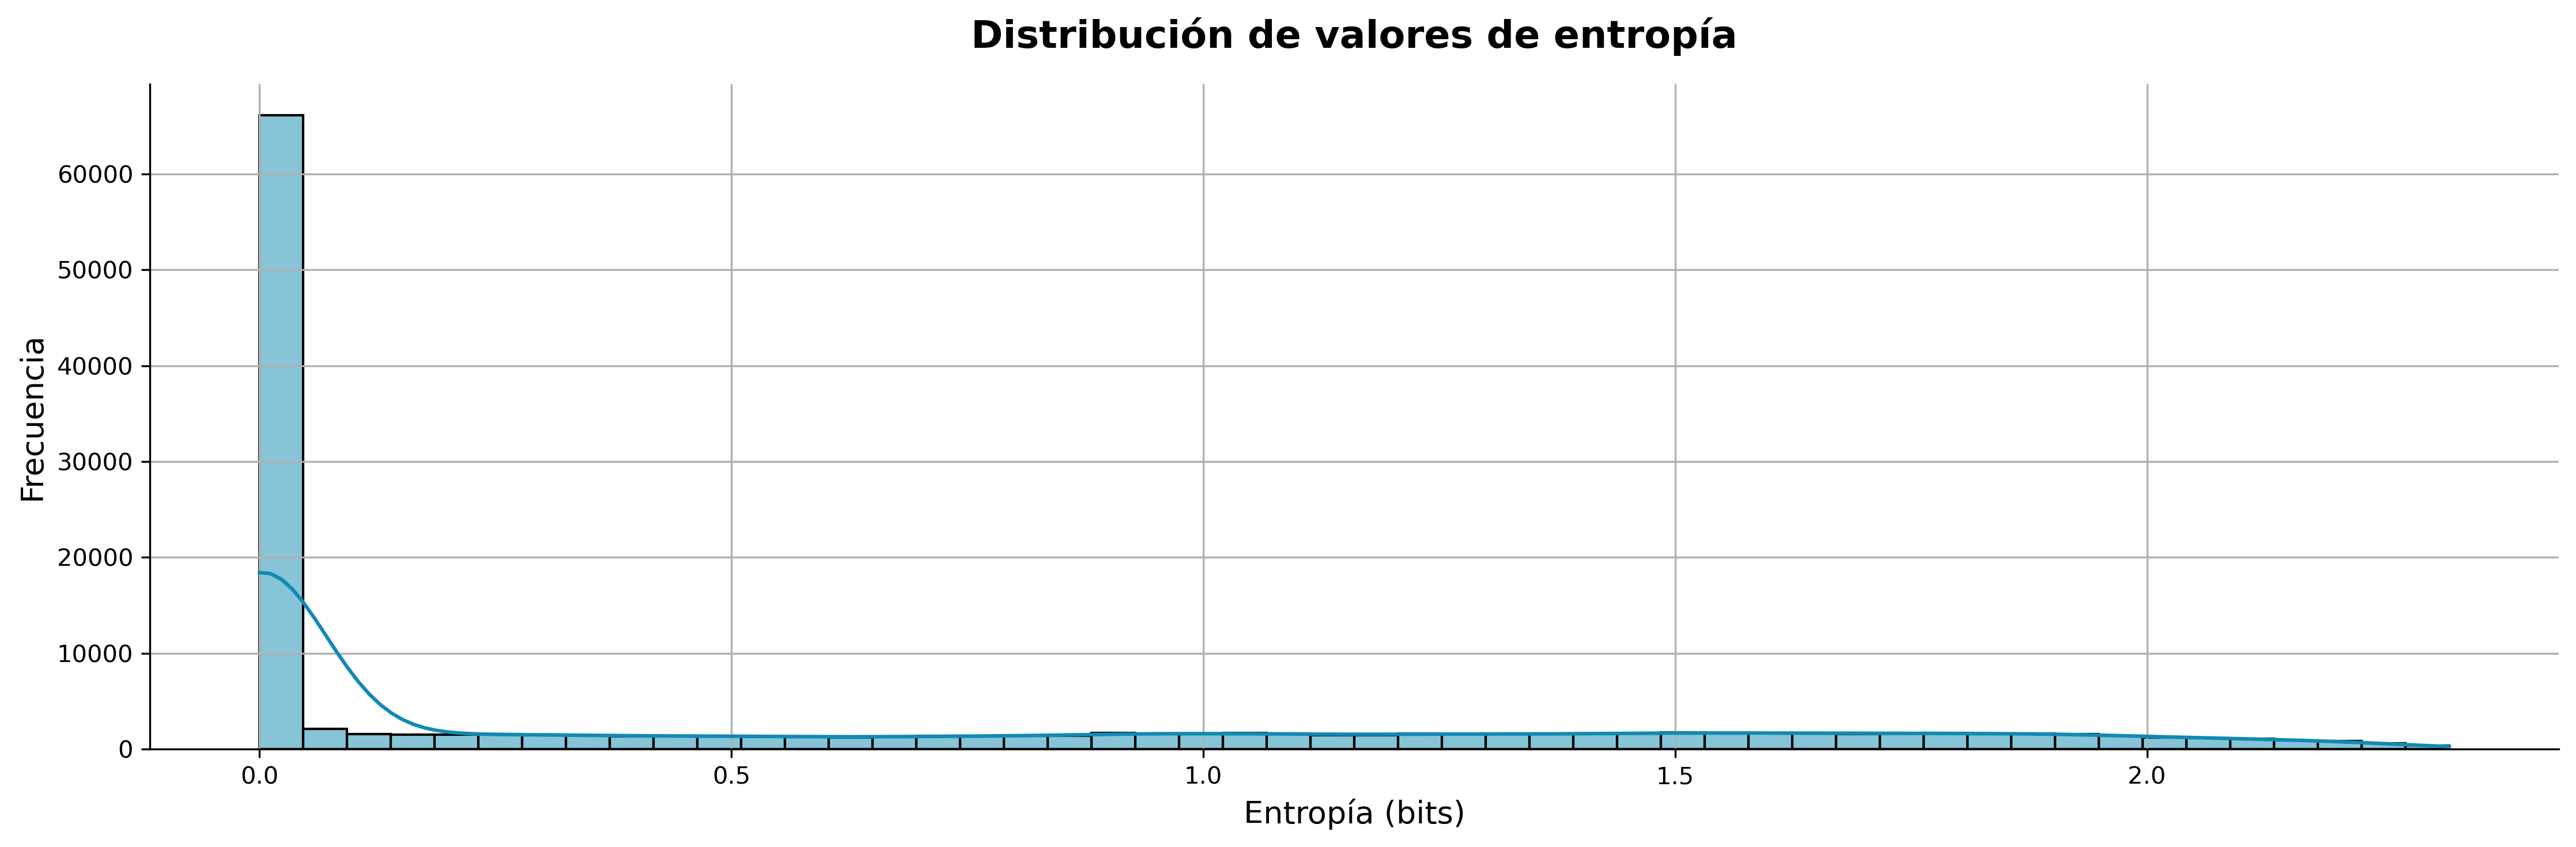

In [68]:
plt.figure(figsize=(15, 5), dpi=300)

sns.histplot(data=long_df_full, x='entropy', bins=50, kde=True, color='#118AB2')

plt.title('Distribución de valores de entropía', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Entropía (bits)', fontsize=13)
plt.ylabel('Frecuencia', fontsize=13)

plt.grid(True)
sns.despine()
plt.tight_layout()
plt.show()

# ¿Normalizar la entropia?


In [69]:
long_df_full['entropy_log'] = np.log1p(long_df_full['entropy'])

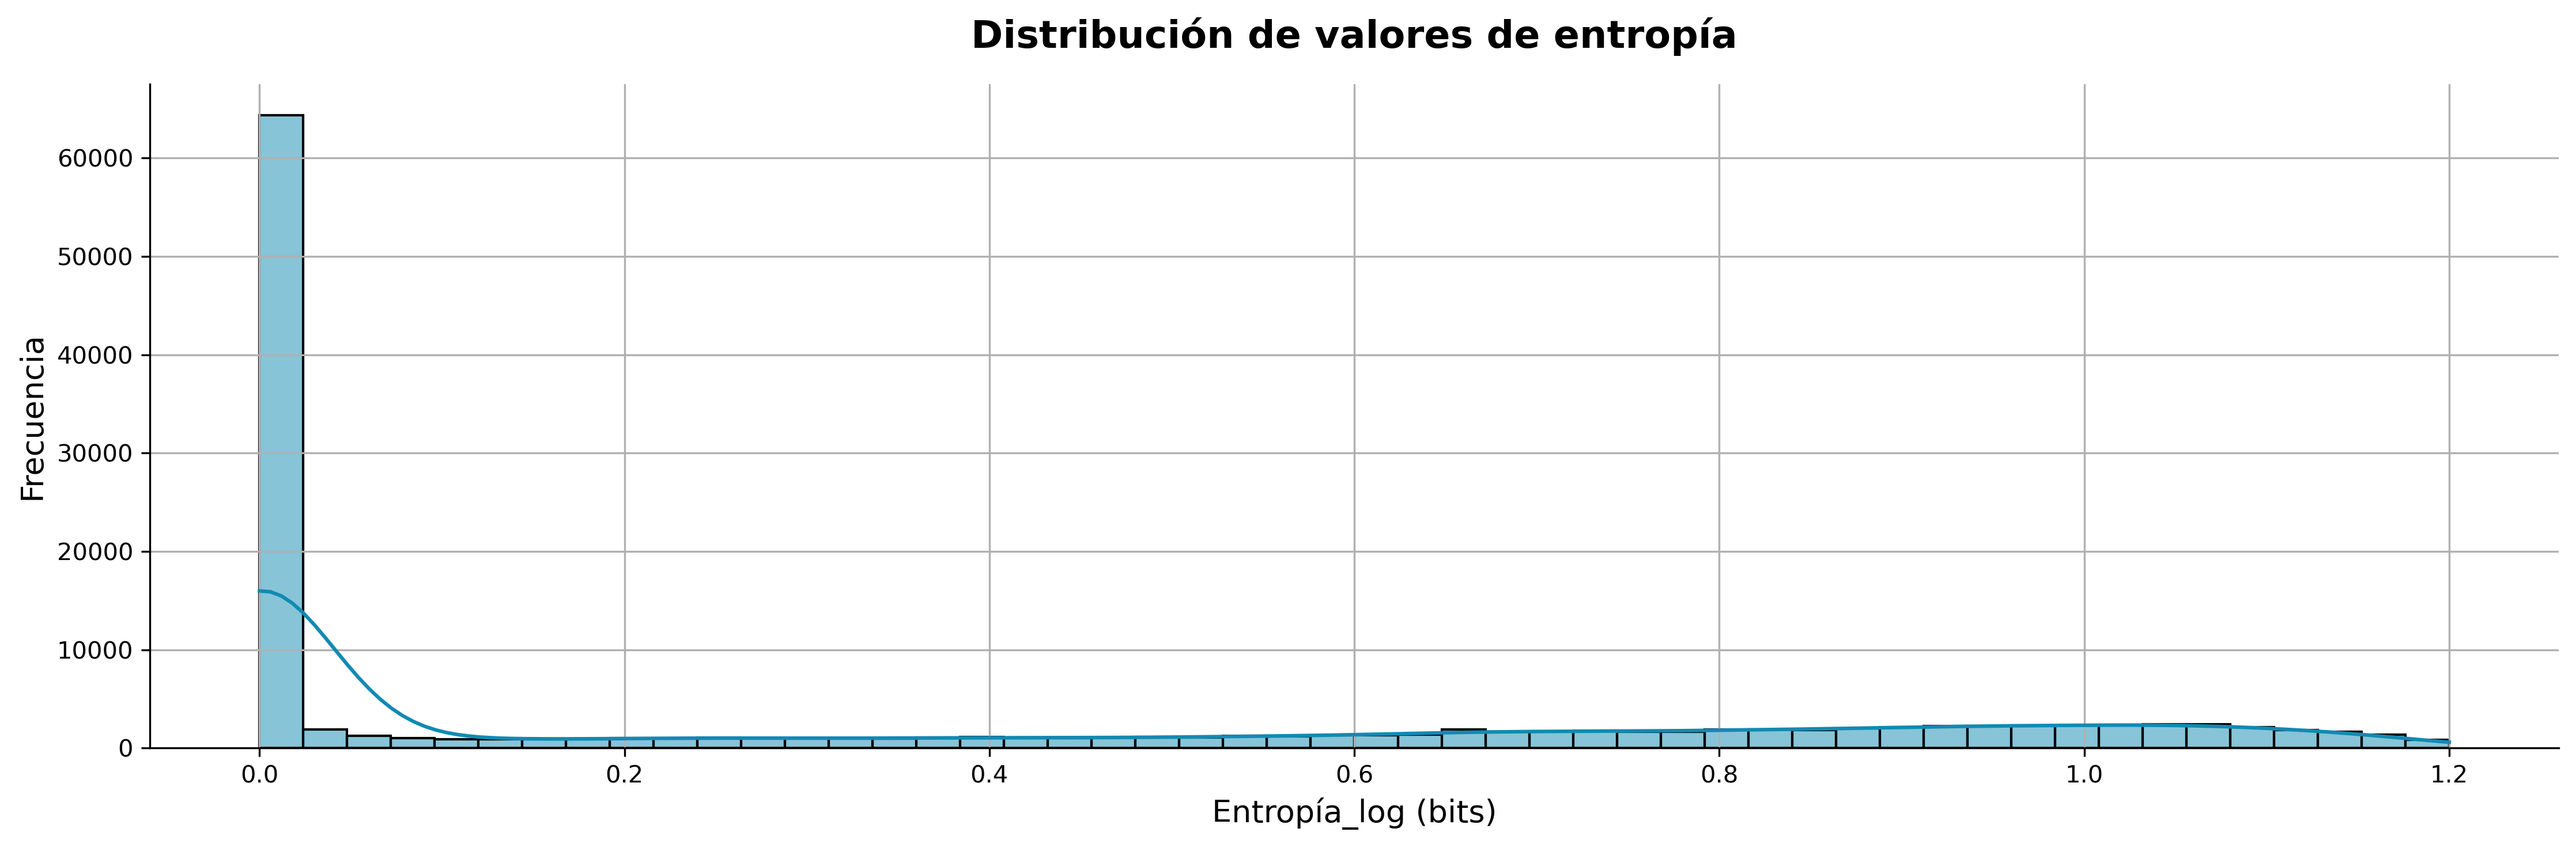

In [70]:
plt.figure(figsize=(15, 5), dpi=300)

sns.histplot(data=long_df_full, x='entropy_log', bins=50, kde=True, color='#118AB2')

plt.title('Distribución de valores de entropía', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Entropía_log (bits)', fontsize=13)
plt.ylabel('Frecuencia', fontsize=13)

plt.grid(True)
sns.despine()
plt.tight_layout()
plt.show()

aplicamos una transformación `log1p` sobre los valores de entropía para reducir el fuerte sesgo hacia cero observado en su distribución original.
Aunque visualmente la transformación no modificó drásticamente la forma de la distribución, sigue siendo una buena práctica incluirla, ya que:

    Reduce la magnitud de valores extremos.

    Suaviza diferencias grandes sin perder la relación entre valores.

    Puede facilitar la convergencia del modelo de red neuronal al manejar mejor la escala de esta feature frente a otras.

Se consideró que, pese a su impacto visual limitado, la transformación aporta robustez al preprocesamiento y se mantendrá en la versión final de los datos.